In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from datetime import datetime
import os,sys
import json

In [16]:
#del simulation
simulation = pd.read_csv("cosmics_simulation.csv")

## Real data
for i in range(1,5):
    exec('run%d'%i + '= pd.read_csv("processed/run%d.csv")'%i)
    iread=0
    if os.path.isfile('processed/run%d.json'%i):
        print("-> reading metadata for processed/run%d.json"%i)
        with open( 'processed/run%d.json'%i ) as jin:
            meta = json.load(jin)
        exec('time%d'%i + ' = meta["runtime"]')
    else:
        with open('data/cosmics%d.txt'%i) as bare:
            for l in bare:
                try:
                    iread = int(l.split()[0])
                except: pass
        exec('time%d'%i + ' = iread')
        
#run1 = pd.read_csv("processed/run1.csv") ## 170 min
#run2 = pd.read_csv("processed/run2.csv") ## 340 min
#run3 = pd.read_csv("processed/run3.csv") ## 23 min
#run4 = pd.read_csv("processed/run4.csv") ## 24 min/ ongoing

#time1= 170
#time2= 340.
#time3 = 23
#time4 = 109

print("Data taking rates")
print("* ", len(run1) / time1, "evt/min")
print("* ", (run1['hyb1'] == run1['hyb2']).sum() / time1 ,"evt/min","same hyb")
print("* ", len(run2) / time2, "evt/min")
print("* ", (run2['hyb1'] == run2['hyb2']).sum() / time2 ,"evt/min","same hyb")
print("Run3")
print("* ", (run3['hyb1'] == run3['hyb2']).sum() / time3 ,"evt/min","same hyb")
print("Run4")
print("* ", (run4['hyb1'] == run4['hyb2']).sum() / time4 ,"evt/min","same hyb")

-> reading metadata for processed/run2.json
-> reading metadata for processed/run4.json
Data taking rates
*  0.43859649122807015 evt/min
*  0.23976608187134502 evt/min same hyb
*  0.4588235294117647 evt/min
*  0.2323529411764706 evt/min same hyb
Run3
*  0.21739130434782608 evt/min same hyb
Run4
*  0.2639593908629442 evt/min same hyb


Text(0.5, 0, 'theta [rad]')

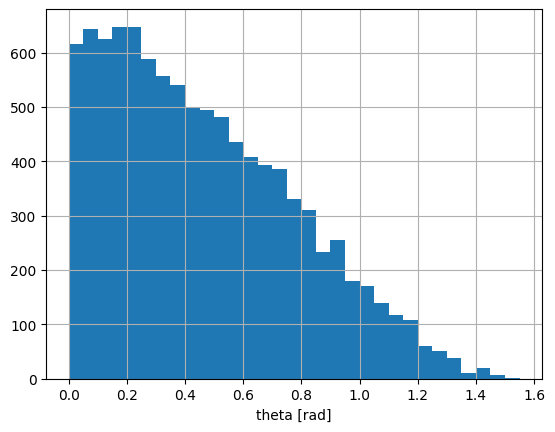

In [22]:
import matplotlib.pyplot as plt
simulation['cost'].apply(math.acos).hist(bins=np.arange(0,np.pi/2.,0.05))
plt.xlabel("theta [rad]")
#simulation['cost'].hist(bins=np.arange(0,1,0.02))

In [72]:
## Both towers
time_min = (simulation['t'].to_numpy()[-1] / 60.)
print("* simulation rate", "%.2f"% (len(simulation)/ time_min),"evt/min")
## 1 *
print("Geometric Acceptance, hyb0", simulation['isin-hyb0'].sum() / len(simulation) )
print(" * Rate", "%.2f"%(simulation['isin-hyb0'].sum() / time_min),"evt/min" )

#print("Geometric Acceptance, hyb1", simulation['isin-hyb1'].sum() / len(simulation) )
nw = 8
cut = math.cos(math.atan( nw*0.1/2.6 )) ## +/-3 strip
print("Cut", (simulation['cost'] > cut).sum() / len(simulation) )
cut2 = math.sin(math.atan( nw*0.1/2.6 ))

print("Cut2 is",cut2)
simulation['bend-proj'] = simulation['phi'].apply(math.cos).apply(abs) * simulation['cost'].apply(math.acos).apply(math.sin)
## should be the same. to check sin vs tan
simulation['bend-proj2'] =  (simulation['phi'].apply(math.cos) * simulation['cost'].apply(math.acos).apply(math.sin) / simulation['cost'] ) .apply(math.atan)


print("Cut-3D", (simulation['bend-proj'] < cut2)    .sum() / len(simulation) )

print("==== Full ACCEPTANCE REDUCTION ====")
print("Geometric+Bend Acceptance, hyb0", (simulation['isin-hyb0'] & (simulation['bend-proj']<cut2)).sum() / len(simulation) )
print(" * rate", "%.2f"%( (simulation['isin-hyb0'] & (simulation['bend-proj']<cut2)).sum() /  time_min),"evt/min"  )
#print("Geometric+Bend Acceptance, hyb1", (simulation['isin-hyb1'] & (simulation['bend-proj']<cut2)).sum() / len(simulation) )

print("===== SINGLE LINK =======")
print("* simulation rate", "%.2f"% (len(simulation)/ time_min),"evt/min")

#m0.get(0).EndX()
hyb= 0
simulation["isin-l0h0"] = (simulation["impact-y"] >= tower.get("m0").get(hyb).x[1] ) & (simulation["impact-y"] <= tower.get("m0").get(hyb).EndY()[1]) & (simulation["impact-z"] >= tower.get("m0").get(hyb).x[2] ) & (simulation["impact-z"] <= tower.get("m0").get(hyb).EndZ()[2])
print("* single hybrid", "%.2f"% ( (simulation['isin-l0h0']).sum()/ time_min),"evt/min")
print("* bending cut", "%.2f"% ( (simulation['isin-l0h0'] & (simulation["bend-proj"] <cut2) ).sum()/ time_min),"evt/min")
print("* bending cut", "%.2f"% ( (simulation['isin-l0h0'] & (simulation["bend-proj2"] <cut2) ).sum()/ time_min),"evt/min")
    


* simulation rate 120.09 evt/min
Geometric Acceptance, hyb0 0.3671
 * Rate 44.09 evt/min
Cut 0.3755
Cut2 is 0.2940858488375231
Cut-3D 0.6209
==== Full ACCEPTANCE REDUCTION ====
Geometric+Bend Acceptance, hyb0 0.2857
 * rate 34.31 evt/min
===== SINGLE LINK =======
* simulation rate 120.09 evt/min
* single hybrid 120.09 evt/min
* bending cut 74.57 evt/min
* bending cut 95.04 evt/min


<Axes: >

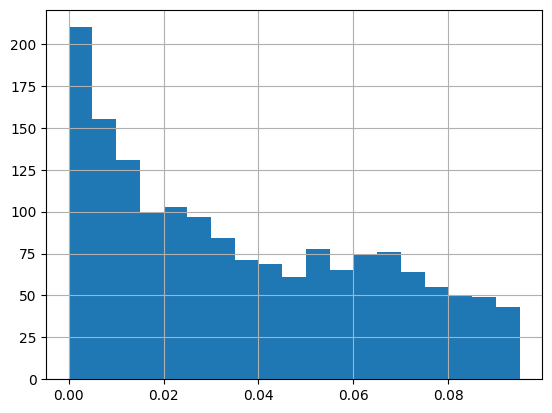

In [53]:
#simulation['bend-proj'] = simulation['phi'].apply(math.cos) * simulation['cost'].apply(math.acos).apply(math.sin)
simulation[ simulation['isin-hyb0'] ]['bend-proj'].hist(bins=np.arange(-0,0.1,0.005))

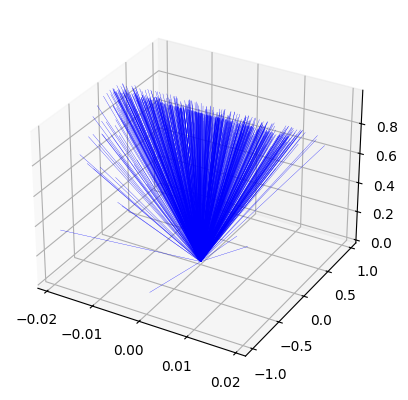

In [70]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d

sel = simulation['isin-l0h0'] & (simulation["bend-proj"] <cut2)
#sel = simulation['isin-l0h0'] & (simulation['cost'] > cut)

theta = simulation[sel]['cost'].apply(math.acos).to_numpy()
phi = simulation [sel]['phi'].to_numpy()

############
R=1
X = R * np.sin(theta) * np.cos(phi)
Y = R * np.sin(theta) * np.sin(phi)
Z = R * np.cos(theta)
##############

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
for i in range(0,len(theta)):
    XX = [0.,X[i]]
    YY = [0.,Y[i]]
    ZZ = [0, Z[i]]
    ax.plot3D(
        XX, YY, ZZ,linewidth=0.2, color='blue')

plt.show()

In [69]:
np.min(Z)

-0.9999961770744732

## Analyze Data

In [6]:
### ANALYZE RUN

run = run4

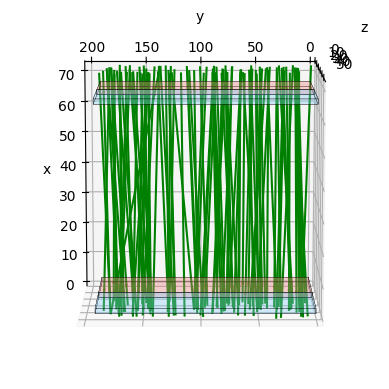

In [7]:
from cosmics.geometry import *
from cosmics.tower import *

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
d = {'ax':ax,'plt':plt,'fig':fig}

ax.set_xlim(0, Hybrid.dx + 10 + 60);
ax.set_ylim(0, Hybrid.dy + 10);
ax.set_zlim(0, Hybrid.dz*2 + 10);

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.view_init(elev=100, azim=180, roll=0)

m0.get(0).active=True
m1.get(0).active=True

#tower.draw(d)


### Multiple tracks
#trk = Track()
#trk.setup(m0.get(0,7,4,188),m1.get(0,11,4,115))
#trk.draw(d)
for h in range(0,2):
    for s in m0.get(h).components.values(): s.active=False
    for s in m1.get(h).components.values(): s.active=False

tracks = []
for i in range(0, len(run)):
    t = Track()
    if run.iloc[i]["hyb2"] != 0: continue
    ## hyb, z, chip ,strip
    t.setup(m0.get(
        run.iloc[i]["hyb1"],run.iloc[i]["z1"], run.iloc[i]['chip1'],run.iloc[i]['strip1']
    ),m1.get(
        run.iloc[i]["hyb2"],run.iloc[i]["z2"], run.iloc[i]['chip2'],run.iloc[i]['strip2']
    ))

    m0.get(
        run.iloc[i]["hyb1"],run.iloc[i]["z1"], run.iloc[i]['chip1'],run.iloc[i]['strip1']
    ).active = True
    m1.get(
        run.iloc[i]["hyb2"],run.iloc[i]["z2"], run.iloc[i]['chip2'],run.iloc[i]['strip2']
    ).active = True

    tracks.append(t)

tower.draw(d)
[    t.draw(d) for t in tracks]

print()

In [8]:
#### Add things -> TODO add to processing
if False:
    to_add = {"impact1-x":[],"impact1-y":[],"impact1-z":[],
              "impact2-x":[],"impact2-y":[],"impact2-z":[],
              "theta":[],
              "bend":[],
             }
    for i in range(0, len(run)):
        s0 = m0.get(run.iloc[i]["hyb1"],run.iloc[i]["z1"], run.iloc[i]['chip1'],run.iloc[i]['strip1'])
        s1 = m1.get(run.iloc[i]["hyb2"],run.iloc[i]["z2"], run.iloc[i]['chip2'],run.iloc[i]['strip2'])
    
        p0 = (s0.start + s0.stop)/2.
        p1 = (s1.start + s1.stop)/2.
    
        to_add["impact1-x"].append(p0[0])
        to_add["impact1-y"].append(p0[1])
        to_add["impact1-z"].append(p0[2])
        
        to_add["impact2-x"].append(p1[0])
        to_add["impact2-y"].append(p1[1])
        to_add["impact2-z"].append(p1[2])
    
        to_add["theta"].append(   math.atan( math.sqrt(  (p0[1]-p1[1])**2 + (p0[2]-p1[2])**2) / abs(p0[0]-p1[0])  ) )
        to_add["bend"] .append(   math.atan(  (p0[1]-p1[1]) / abs(p0[0]-p1[0])  ))
    
    
    for col in to_add.keys():
        run[col] = np.array(to_add[col])
    
    for i in range(1,3):
        run['bdec%d'%i] = run['bend%d'%i].map({
            0b000:0,
            0b001:1,
            0b010:2,
            0b011:3,
            0b101:-1,
            0b110:-2,
            0b100:-3,
            0b111:10,
            })
    

<Axes: >

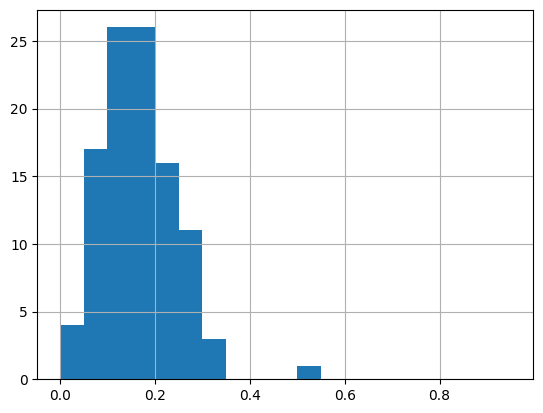

In [34]:
run[run["hyb2"]==0]["theta"].hist(bins=np.arange(0,1,0.05))
#run[run["hyb2"]==1]["theta"].hist(bins=np.arange(0,1,0.05))
#run[run["hyb2"]==0]["bend"].hist(bins=np.arange(-0.2,.2,0.02))
#run[run["hyb2"]==1]["bend"].hist(bins=np.arange(-1,1,0.02), color='gold')

Text(0.5, 0, 'Delta strip')

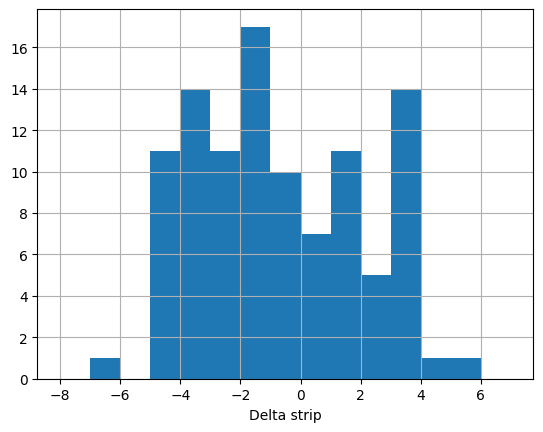

In [35]:
run[run["hyb2"]==0]["bend"].apply(lambda x: x*2.6/0.1).hist(bins=np.arange(-8,8,1))
plt.xlabel("Delta strip")
#run[run["hyb2"]==1]["bend"].hist(bins=np.arange(-.2,.2,0.01))

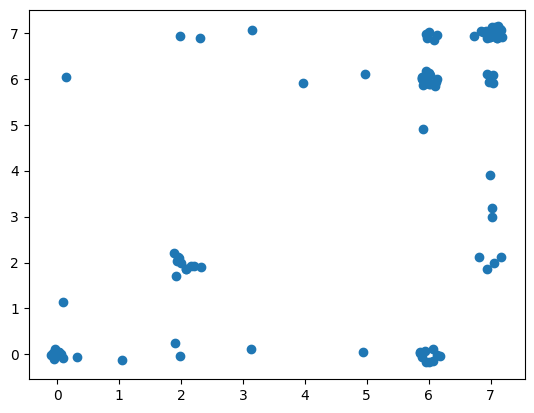

In [36]:
plt.scatter( 
        run[run['hyb2']==0]['bend1'].to_numpy() + np.random.normal(0,0.1,size=len(run[run['hyb2']==0])), 
        run[run['hyb2']==0]['bend2'].to_numpy() + np.random.normal(0,0.1,size=len(run[run['hyb2']==0])), 
           )

Text(0, 0.5, 'bend2')

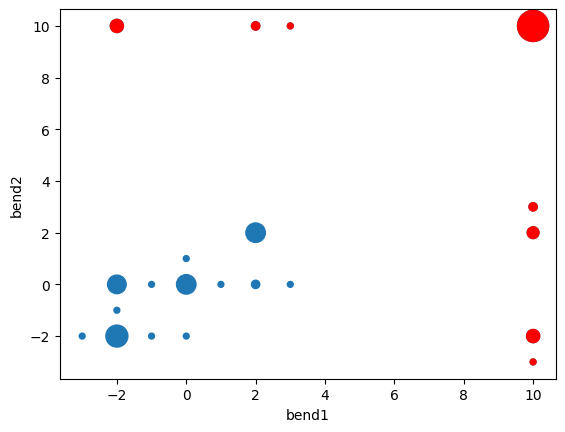

In [37]:
X = [ x[0] for x in run[run['hyb2']==0][['bdec1','bdec2']].value_counts().index.to_numpy() ]
Y = [ x[1] for x in run[run['hyb2']==0][['bdec1','bdec2']].value_counts().index.to_numpy() ]
S= run[run['hyb2']==0][['bdec1','bdec2']].value_counts().to_numpy()
plt.scatter( X, Y, s=S *500/np.max(S) )

X = [ x[0] for x in run[(run['hyb2']==0) & ((run['bdec1']>9)| (run['bdec2']>9))][['bdec1','bdec2']].value_counts().index.to_numpy() ]
Y = [ x[1] for x in run[(run['hyb2']==0) & ((run['bdec1']>9)| (run['bdec2']>9))][['bdec1','bdec2']].value_counts().index.to_numpy() ]
S= run[(run['hyb2']==0) & ((run['bdec1']>9)| (run['bdec2']>9))][['bdec1','bdec2']].value_counts().to_numpy()
plt.scatter( X, Y, s=S *500/np.max(S), color='r' )



plt.xlabel("bend1")
plt.ylabel("bend2")

Text(0, 0.5, 'bend encoding')

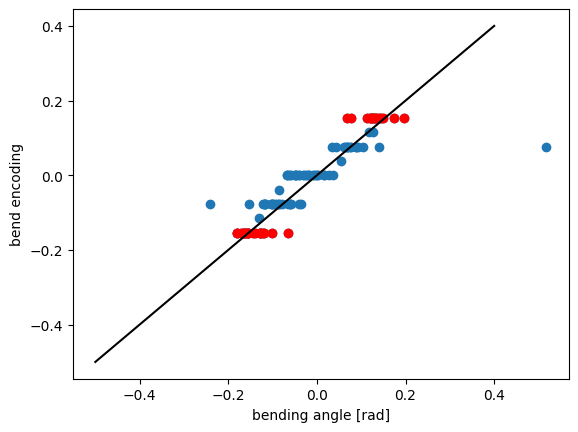

In [38]:
what='bdec2'
run['rizzi2'] = run[['bdec2','bend']].apply(lambda x: x['bdec2'] if x['bdec2']<10 else 4 if x['bend']>0 else -4, axis=1)

what='rizzi2'

sel = (run['hyb2']==0)  #& (run[what]<9)


plt.scatter( 
        run[sel]['bend'].to_numpy() , #+ np.random.normal(0,0.00001,size=len(run[sel])), 
        (run[sel][what] *.1/2.6 ).to_numpy()   #+ np.random.normal(0,0.00001,size=len(run[sel])), 
           )
sel = sel & (run['bdec2']>9)
plt.scatter( 
        run[sel]['bend'].to_numpy() , #+ np.random.normal(0,0.00001,size=len(run[sel])), 
        (run[sel][what] *.1/2.6 ).to_numpy() ,  #+ np.random.normal(0,0.00001,size=len(run[sel])), 
        color='red'
           )

plt.plot( np.arange(-.5,.5,.1),np.arange(-.5,.5,.1),c='black')
#x = np.arange(-.5,.5,.1)
#y = 0.97806334*x+ 0.00720599
#plt.plot( x,y, color='gray')
plt.xlabel("bending angle [rad]")
plt.ylabel("bend encoding" )

In [14]:
sel = (run['hyb2']==0)  & (run['bend'].apply(abs)<0.25)
np.polyfit( (run[sel]['bend'] ).to_numpy(), (run[sel]['rizzi2'] *  .1/2.6).to_numpy(), deg=1)


array([0.94464902, 0.01171059])

<Axes: >

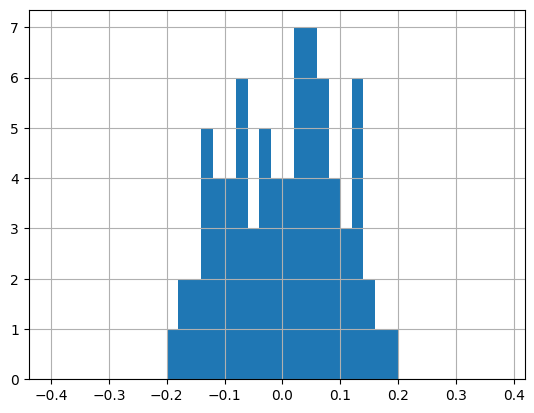

In [15]:
run[run["hyb2"]==1]["bend"].hist(bins=np.arange(-0.4,.4,0.02))

In [16]:
#small = run[(run["hyb2"]==0) & (run["bend"].apply(abs) > 0.01)][["z1","chip1","strip1","z2","chip2","strip2"]]
#small["chip2"].apply(np.binary_repr)

In [17]:
run4[["hyb1","hyb2"]].value_counts()

hyb1  hyb2
0     0       104
      1        80
Name: count, dtype: int64

In [18]:

## hyb, z, chip strip
m0.get(0,10,1,1).start[1] -m0.get(0,10,1,2).start[1]
#m0.get(0,10,1,1).stop[1] -m0.get(0,10,1,2).stop[1]

-0.09999999999999432

In [19]:
run["bdec1"].value_counts()


bdec1
 10    63
-2     45
 2     38
 0     30
 3      2
-3      2
-1      2
 1      2
Name: count, dtype: int64

In [20]:
run["bdec2"].value_counts()

bdec2
 10    58
-2     44
 0     41
 2     30
-1      4
 3      3
-3      2
 1      2
Name: count, dtype: int64

In [9]:
singles = pd.read_csv("processed/singles4_filtered.txt",sep=' ',header=1)
for il in range(0,2):
    for ih in range(0,2):
        print("Rate Single",il,ih, ((singles["link"] == il) & (singles["hyb"]==ih) ) .sum() / time4  )
singles

Rate Single 0 0 1.9035532994923858
Rate Single 0 1 0.0
Rate Single 1 0 1.9060913705583757
Rate Single 1 1 2.048223350253807


,###iread,link,hyb,hex(whole),nstubs,bx,chip_id,strip,bend,Z
0,1,0,0,0x74af0d7d,1,3371,6,26,7,13
1,1,0,0,0x72250f66,1,3209,2,30,6,6
2,1,1,0,0x595b2d68,1,1622,6,90,6,8
3,1,1,1,0x57e4e0e7,1,1529,1,193,6,7
4,1,1,1,0x72252673,1,3209,2,76,7,3
...,...,...,...,...,...,...,...,...,...,...
2303,393,1,1,0x47a6706f,1,489,4,224,6,15
2304,394,0,0,0x59626f08,1,1624,4,222,0,8
2305,394,1,0,0x4fc3e107,1,1008,7,194,0,7
2306,394,1,1,0x59601962,1,1624,0,50,6,2


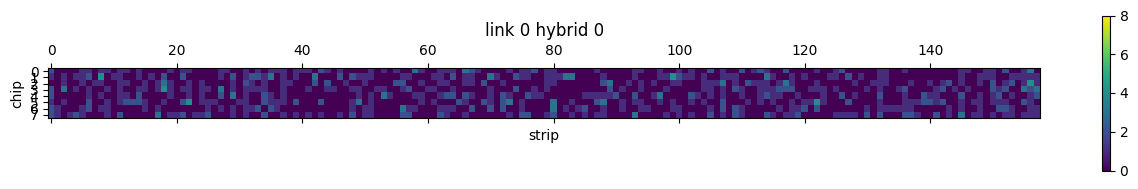

In [108]:
#A= singles[ (singles["link"] == 0) & (singles["hyb"]==0) ][["chip_id","strip"]].to_numpy()
A=pd.pivot_table(singles[ (singles["link"] == 0) & (singles["hyb"]==0) ][["chip_id","strip"]],index = "chip_id",columns="strip",aggfunc=len).fillna(0)
plt.matshow(A,vmin=0,vmax=8)
plt.xlabel("strip")
plt.ylabel("chip")
plt.title("link 0 hybrid 0")
plt.colorbar()

Text(0.5, 1.0, 'link 1 hybrid 0')

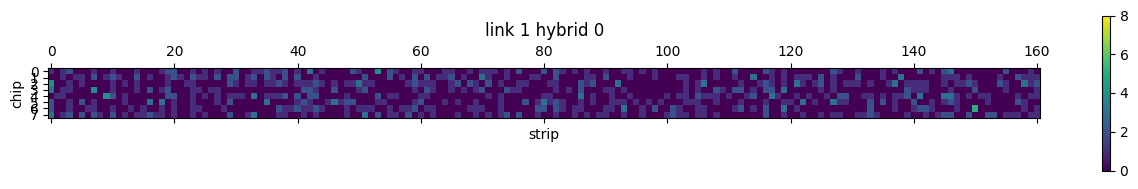

In [114]:
A=pd.pivot_table(singles[ (singles["link"] == 1) & (singles["hyb"]==0) ][["chip_id","strip"]],index = "chip_id",columns="strip",aggfunc=len).fillna(0)
plt.matshow(A,vmin=0,vmax=8)
plt.colorbar()
plt.xlabel("strip")
plt.ylabel("chip")
plt.title("link 1 hybrid 0")

Text(0.5, 1.0, 'link 1 hybrid 1')

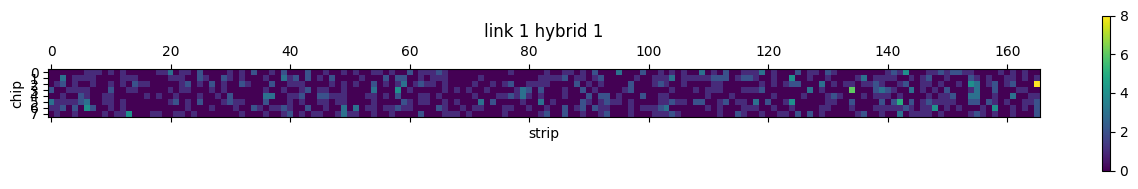

In [24]:
A=pd.pivot_table(singles[ (singles["link"] == 1) & (singles["hyb"]==1) ][["chip_id","strip"]],index = "chip_id",columns="strip",aggfunc=len).fillna(0)
plt.matshow(A,vmin=0,vmax=8, )
plt.colorbar()
plt.xlabel("strip")
plt.ylabel("chip")
plt.title("link 1 hybrid 1")

Text(0.5, 1.0, 'link 0 hybrid 0')

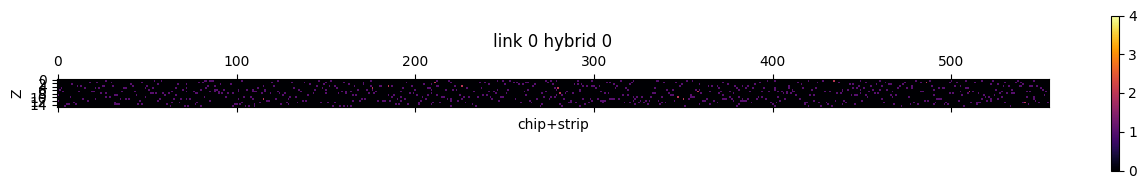

In [143]:
singles['strip2'] = singles['chip_id']*240 + singles['strip']
A=pd.pivot_table(singles[ (singles["link"] == 0) & (singles["hyb"]==0) ][["strip2","Z"]],index = "Z",columns="strip2",aggfunc=len).fillna(0)

plt.matshow(A,vmin=0,vmax=4, cmap='inferno') ## plasma
plt.colorbar()
plt.xlabel("chip+strip")
plt.ylabel("Z")
plt.title("link 0 hybrid 0")



In [135]:
B=A.to_numpy().reshape( A.shape[0] * A.shape[1])
np.sum(B ==0 ) / len(B)

0.9171171171171171

mean 0.08445945945945946 +/- 0.28368858334523894
to mean 3.0 : 9.718666666666667 days expected fraction to be 0 0.049787068367863944


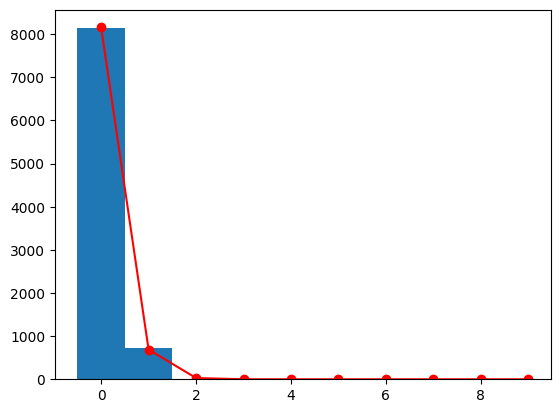

In [142]:
import matplotlib.pyplot as plt
from scipy.stats import poisson
plt.hist( B, bins=np.arange(-0.5,9.5,1))

x = np.arange(0,10,1)
y = poisson.pmf(x, np.mean(B)) * len(B)
plt.plot(x,y, color='red',marker='o',)

print("mean",np.mean(B),"+/-",np.std(B))
target=3.
print("to mean",target,":", target/np.mean(B) * time4 /60. /24.,"days", "expected fraction to be 0", poisson.pmf(0,target) )

In [107]:
time4

394

In [139]:
poisson.pmf(0, 1)  

0.36787944117144233

In [129]:
394*2.1/.58 /60.


23.775862068965523